## One feature (exam score) --> { admission, rejection }

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [1]:
import numpy as np

def sigmoid(z):
    return 1/ (1 + np.exp(-z))

# testing the sigmoid function
sigmoid(0), sigmoid(-1), sigmoid(2.1)

(0.5, 0.2689414213699951, 0.8909031788043871)

### Loading data

In [89]:
X_raw=np.array([272,331,295,287,315,266,303,294,317,309])
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw.reshape(-1,1),O],axis=1)
t=np.array([0,1,1,0,1,0,0,0,1,1])

In [7]:
X

array([[272.,   1.],
       [331.,   1.],
       [295.,   1.],
       [287.,   1.],
       [315.,   1.],
       [266.,   1.],
       [303.,   1.],
       [294.,   1.],
       [317.,   1.],
       [309.,   1.]])

#### Newton's Method
$$\mathbf w_{i+1} = \mathbf w_i - \eta (X^\top R X)^{-1} X^\top (\mathbf y-\mathbf t)$$
where $y_n=\sigma(\mathbf x_n \mathbf w)$ and $R=\mathrm{diag}( y_n(1-y_n))$.

In [90]:
w=np.array([0,0])
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t)
    print(w)


[  0.07789626 -23.28319321]
[  0.12827731 -38.43122697]
[  0.16949876 -50.83886733]
[  0.18832434 -56.49375121]
[  0.19095149 -57.28091649]
[  0.19099424 -57.293701  ]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]
[  0.19099426 -57.29370435]


In [13]:
def decision(x):
    return sigmoid(w[0]*x+w[1])

In [14]:
print(decision(320))
print(decision(299))
print(decision(150))


0.9786361045459063
0.45352903926683846
3.629301582117012e-13


 ## Two features (GRE %, GPA %) --> { admission, rejection }

### Loading Data

In [49]:
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot
output_notebook()
from sklearn.linear_model import LogisticRegression

Loading BokehJS ...

In [36]:
data = np.genfromtxt('../data/exam.csv',delimiter=',')

In [46]:
data.shape

(110, 3)

In [45]:
data[:5,:]

array([[96., 88.,  1.],
       [64., 83.,  1.],
       [99., 92.,  1.],
       [81., 69.,  0.],
       [73., 76.,  0.]])

In [38]:
X_raw = data[:,:2]
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

t = data[:,-1]

### Built-in Classifier

In [40]:
clf = LogisticRegression(solver='lbfgs').fit(X, t)
clf.score(X,t)

0.8454545454545455

### Plotting of Data

In [74]:
f=figure(width=500,height=400,title='Admissions')
f.scatter(X[t==1,0],X[t==1,1],color="red",marker="o", size=4,legend_label='Admit')
f.scatter(X[t==0,0],X[t==0,1],color="blue",marker="o", size=4,legend_label='Reject')
f.xaxis.axis_label='GRE'
f.yaxis.axis_label='GPA'
f.legend.location = "bottom_left"
show(f)

### Applying Newton's Method

In [86]:
w=np.array([0,0,0])
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t)
    print(w)


[ 0.03188931  0.06146783 -7.25018839]
[  0.04757266   0.12178934 -13.32933715]
[  0.05913424   0.18381012 -19.23744654]
[  0.06622808   0.2253133  -23.12692142]
[  0.06835078   0.23770912 -24.28352366]
[  0.06849556   0.2385381  -24.36081727]
[  0.06849617   0.23854149 -24.36113369]
[  0.06849617   0.23854149 -24.3611337 ]
[  0.06849617   0.23854149 -24.3611337 ]
[  0.06849617   0.23854149 -24.3611337 ]


In [76]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [77]:
print(decision_2(97,89))

0.9710606609150412


### Plotting the decision boundary

In [84]:
x_value= np.array([np.min(X[:,0]),np.max(X[:,0])])
y_value=-(w[0]*x_value+w[2])/w[1]
f.line(x_value,y_value,color='green')
show(f)

### Predictions and Accuracy

In [82]:
y_pred=(sigmoid(X@w).round())

In [31]:
y_pred

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0.])

In [85]:
print("Train Accuracy:", sum(t==y_pred)*100/len(t),"%")

Train Accuracy: 84.54545454545455 %


## Titanic

The data is adapted from that available at

https://www.kaggle.com/heptapod/titanic

$x_{n,1}$ = Age, &emsp;
$x_{n,2}$ = Fare, &emsp;
$t_n$ = $0,1$ (death, survival)

### Loading Data

In [33]:
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot
output_notebook()
from sklearn.linear_model import LogisticRegression

In [91]:
data = np.genfromtxt('../data/titanic-1.csv',delimiter=',')

In [92]:
data.shape

(1309, 3)

In [93]:
data[:5,:]

array([[22.    ,  7.25  ,  0.    ],
       [38.    , 71.2833,  1.    ],
       [26.    ,  7.925 ,  1.    ],
       [35.    , 53.1   ,  1.    ],
       [35.    ,  8.05  ,  0.    ]])

In [94]:
X_raw = data[:,:2]
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

t = data[:,-1]

In [96]:
X[:5,:]

array([[22.    ,  7.25  ,  1.    ],
       [38.    , 71.2833,  1.    ],
       [26.    ,  7.925 ,  1.    ],
       [35.    , 53.1   ,  1.    ],
       [35.    ,  8.05  ,  1.    ]])

### Built-in Classifier

In [97]:
clf = LogisticRegression(random_state=1,solver='lbfgs').fit(X, t)
clf.score(X,t)

0.7333842627960275

### Plotting of Data

In [101]:
f=figure(width=500,height=400,title='Titanic')
f.scatter(X[t==1,0],X[t==1,1],color="red",marker="o", size=4,legend_label='Survival')
f.scatter(X[t==0,0],X[t==0,1],color="blue",marker="o", size=4,legend_label='Death')
f.xaxis.axis_label='Age'
f.yaxis.axis_label='Fare'
f.legend.location = "top_left"
show(f)

### Applying Newton's Method

In [102]:
w=np.array([0,0,0])
for i in range (0,10):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w=w-np.linalg.inv(X.T@R@X)@X.T@(y-t)
    print(w)


[-0.01221559  0.00644746 -0.80910715]
[-0.01598901  0.00765168 -0.8441549 ]
[-0.01625245  0.00771614 -0.84264754]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]
[-0.01625321  0.00771631 -0.84263911]


In [103]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [104]:
print(decision_2(30,7))

0.21819413269224372


### Plotting the decision boundary

In [105]:
x_value= np.array([np.min(X[:,0]),np.max(X[:,0])])
y_value=-(w[0]*x_value+w[2])/w[1]
f.line(x_value,y_value,color='green')
show(f)

### Predictions and Accuracy

In [106]:
y_pred=(sigmoid(X@w).round())

In [107]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
print("Train Accuracy:", sum(t==y_pred)*100/len(t),"%")

Train Accuracy: 73.33842627960276 %


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=np.genfromtxt('../data/haberman.data',delimiter=',')

In [3]:
data[:10,:]

array([[30., 64.,  1.,  1.],
       [30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       [31., 59.,  2.,  1.],
       [31., 65.,  4.,  1.],
       [33., 58., 10.,  1.],
       [33., 60.,  0.,  1.],
       [34., 59.,  0.,  2.],
       [34., 66.,  9.,  2.],
       [34., 58., 30.,  1.]])

In [4]:
t_raw = data[:,-1]
X_raw = data[:,:3]

In [5]:
t_raw[:10]

array([1., 1., 1., 1., 1., 1., 1., 2., 2., 1.])

In [6]:
X_raw[:10,:]

array([[30., 64.,  1.],
       [30., 62.,  3.],
       [30., 65.,  0.],
       [31., 59.,  2.],
       [31., 65.,  4.],
       [33., 58., 10.],
       [33., 60.,  0.],
       [34., 59.,  0.],
       [34., 66.,  9.],
       [34., 58., 30.]])

In [7]:
t = t_raw%2    # 0: death; 1: survival
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw,O],axis=1)
X.shape

(306, 4)

### Splitting the data

We split the data set into two parts: one for train and the other for test.

In [8]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(214, 4) (214,)
(92, 4) (92,)


In [9]:
X_train[:10,:]

array([[39., 63.,  0.,  1.],
       [50., 59.,  2.,  1.],
       [48., 67.,  7.,  1.],
       [67., 61.,  0.,  1.],
       [45., 68.,  0.,  1.],
       [61., 68.,  1.,  1.],
       [61., 64.,  0.,  1.],
       [34., 66.,  9.,  1.],
       [38., 59.,  2.,  1.],
       [52., 62.,  3.,  1.]])

Define the function $\sigma(x) = \dfrac {e^x}{e^x+1}= \dfrac 1 {1+e^{-x}}$.

In [10]:
def sigmoid(x):    
    return 1/ (1 + np.exp(-x))

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \{ t_n \ln y_n + (1-t_n) \ln (1-y_n)\},  $$
where $y_n=\sigma(w_1 x_{n1}+ w_2 x_{n2} + \cdots + w_k x_{nk}+w_{k+1} )$. 

This function will be obtained in Logistic Regression.

In [11]:
def Er(w):
    yn=sigmoid(X_train@w)
    return -(1/n_train)*sum(t_train*np.log(yn)+(1-t_train)*np.log(1-yn))

The gradient of $E$ is given by

$$\nabla E= \left [ \frac 1 N \sum_{n=1}^N (y_n-t_n)x_{nj} \right ] = \frac 1 N X^\top (\mathbf y - \mathbf t).$$


In [12]:
def gradE(w):
    yn=sigmoid(X_train@w)
    return X_train.T@(yn-t_train)/n_train

Set the initial values.

In [13]:
w=np.array([0,0,0,0])
eta=0.0005
iter_num=10000

Run a loop for gradient descent.

In [14]:
for i in range(iter_num):
    w=w-eta*gradE(w)
    if i%1000==0:
        print(w,Er(w))

[6.12149533e-03 7.57943925e-03 9.69626168e-05 1.21495327e-04] 0.5803435394979463
[-0.01557908  0.03508479 -0.07944278  0.00146054] 0.5410431819684293
[-0.01601804  0.0355533  -0.08102107  0.00236192] 0.5410302346795445
[-0.01602904  0.03555112 -0.08105984  0.00325541] 0.5410286314243691
[-0.0160297   0.03553749 -0.08106051  0.0041485 ] 0.541027035819132
[-0.0160301   0.03552358 -0.08106023  0.00504138] 0.5410254409839422
[-0.01603049  0.03550967 -0.08105993  0.00593404] 0.5410238469141974
[-0.01603088  0.03549577 -0.08105963  0.00682648] 0.5410222536095295
[-0.01603128  0.03548186 -0.08105932  0.00771871] 0.5410206610695723
[-0.01603167  0.03546796 -0.08105902  0.00861073] 0.5410190692939624


In [15]:
print(w)

[-0.01603206  0.03545408 -0.08105872  0.00950164]


We compute the accuracy of the trained model.

In [25]:
t_pred=sigmoid(X_test@w).round()
print("Train Accuracy:", sum(t_test==t_pred)*100/n_test,"%")

Train Accuracy: 71.73913043478261 %


In [26]:
t_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1.])

In [18]:
tt=t_test==t_pred

In [19]:
tt

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True])

In [14]:
sum(tt)

70

### Fashion MNIST

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

In [6]:
data=np.genfromtxt('../data/f-mnist-train.csv',skip_header=1,delimiter=',')

In [48]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' )

In [7]:
data[:11,:]

array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 1.,  9.,  0., ...,  0.,  0.,  0.],
       [ 2.,  6.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 8.,  4.,  0., ...,  0.,  0.,  0.],
       [ 9.,  8.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:
data.shape # 28 x 28 = 784

(60000, 786)

In [9]:
t_raw = data[:,1]
X_raw = data[:,2:]

In [12]:
t_raw[:10]

array([2., 9., 6., 0., 3., 4., 4., 5., 4., 8.])

In [13]:
X_raw.shape

(60000, 784)

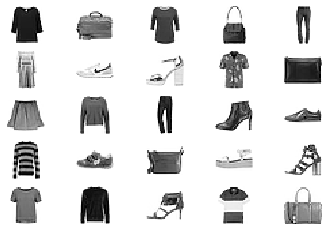

In [14]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [74]:
def to_categorical(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

array=np.array([2,3,1,0,9])
rr=to_categorical(array)
rr

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' )
def to_classes(array):
    for i in range(10):
        if array[i] == 1:
            return classes[i]

In [16]:
t = to_categorical(t_raw)    # 0: death; 1: survival
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw,O],axis=1)
X.shape, t.shape

((60000, 785), (60000, 10))

In [19]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(42000, 785) (42000, 10)
(18000, 785) (18000, 10)


Define the function $\sigma(x) = \dfrac {e^x}{e^x+1}= \dfrac 1 {1+e^{-x}}$.

In [91]:
#def sigmoid(x):    
#    return the function

In [27]:
def sigmoid(x):    
    return 1/ (1 + np.exp(-x))

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \{ t_n \ln y_n + (1-t_n) \ln (1-y_n)\},  $$
where $y_n=\sigma(w_1 x_{n1}+ w_2 x_{n2} + \cdots + w_k x_{nk}+w_{k+1} )$. 

This function will be obtained in Logistic Regression.

In [11]:
def Er(w):
    yn=sigmoid(X_train@w)
    return -(1/n_train)*sum(t_train*np.log(yn)+(1-t_train)*np.log(1-yn))

The gradient of $E$ is given by

$$\nabla E= \left [ \frac 1 N \sum_{n=1}^N (y_n-t_n)x_{nj} \right ] = \frac 1 N X^\top (\mathbf y - \mathbf t).$$


In [31]:
def gradE(w):
    y=sigmoid(X_train@w)
    return X_train.T@(y-t_train)/n_train

Set the initial values.

In [29]:
w=np.zeros((785,10))
eta=0.00001
iter_num=2000

Run a loop for gradient descent.

In [32]:
for i in range(iter_num):
    w=w-eta*gradE(w)
    if i%200==0:
        print(sum(w).round(2))

[-0.22 -0.24 -0.21 -0.23 -0.21 -0.26 -0.22 -0.25 -0.22 -0.23]
[-0.03 -0.08 -0.02 -0.09 -0.11 -0.07 -0.02 -0.13  0.01 -0.08]
[-0.05 -0.08 -0.04 -0.1  -0.13 -0.09 -0.05 -0.14  0.01 -0.09]
[-0.05 -0.07 -0.05 -0.11 -0.15 -0.1  -0.05 -0.15  0.02 -0.1 ]
[-0.05 -0.07 -0.05 -0.11 -0.16 -0.11 -0.04 -0.16  0.02 -0.1 ]
[-0.05 -0.07 -0.06 -0.12 -0.17 -0.12 -0.04 -0.17  0.02 -0.11]
[-0.05 -0.07 -0.06 -0.12 -0.18 -0.13 -0.06 -0.18  0.02 -0.11]
[-0.05 -0.07 -0.06 -0.12 -0.18 -0.13 -0.12 -0.18  0.02 -0.12]
[-0.05 -0.07 -0.07 -0.12 -0.19 -0.14 -0.04 -0.19  0.02 -0.12]
[-0.05 -0.07 -0.07 -0.12 -0.2  -0.14 -0.13 -0.2   0.02 -0.13]


We compute the accuracy of the trained model.

In [35]:
t_p=sigmoid(X_test@w)
t_pred=np.floor(t_p/np.max(t_p,axis=1, keepdims=True))

In [40]:
accuracy=np.sum(np.all(t_pred == t_test, axis=1))*100/n_test
print("Accuracy with Test:", accuracy.round(4),"%")

Accuracy with Test: 82.5833 %


Prediction: T-shirt/top


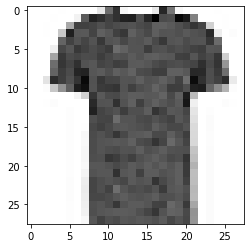

In [75]:
rd=randint(0,n_test)
plt.imshow(X_test[rd,:-1].reshape(28,28), cmap='Greys')
print('Prediction:', to_classes(t_test[rd]))